In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter, FuncFormatter
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading in the Dataset (Preprocess)

In [27]:
df = pd.read_csv('data/cleaned_merged_seasons.csv', index_col=0)
# df.head()

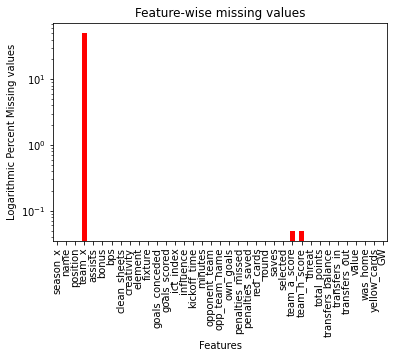

In [28]:
# PLot the percent of missing values per feature

missing_vals = (df.isna().sum()/df.shape[0])*100
ax = missing_vals.plot(kind='bar', color = 'red')
ax.set_title('Feature-wise missing values')
ax.set_ylabel('Logarithmic Percent Missing values')
ax.set_xlabel('Features')
ax.set_yscale("log")
plt.show()

In [29]:
# dropping team information
df = df.drop(columns=['team_x', 'fixture', 'kickoff_time'])
df = df.fillna(0)

In [30]:
# rearranging columns for better perception

columns = ['season_x', 'name', 'position', 'assists', 'bonus', 'bps',
           'clean_sheets', 'creativity', 'element', 'goals_conceded',
           'goals_scored', 'ict_index', 'influence', 'minutes',
           'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
           'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
           'team_a_score', 'team_h_score', 'threat', 'total_points',
           'transfers_balance', 'transfers_in', 'transfers_out', 'value',
           'was_home', 'yellow_cards', 'GW']

new_columns = ['name', 'season_x', 'GW', 'position',  'assists', 'bonus', 'bps',
               'clean_sheets', 'creativity', 'element', 'goals_conceded',
               'goals_scored', 'ict_index', 'influence', 'minutes',
               'opponent_team', 'opp_team_name', 'own_goals', 'penalties_missed',
               'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
               'team_a_score', 'team_h_score', 'threat',
               'transfers_balance', 'transfers_in', 'transfers_out', 'value',
               'was_home', 'yellow_cards',  'total_points']

df = df[new_columns]
# df.head()

In [31]:
# columns that need averaging
avg_columns = ['name', 'assists', 'bonus', 'bps', 'clean_sheets',
               'creativity', 'element', 'goals_conceded', 'goals_scored', 'ict_index',
               'influence', 'minutes', 'own_goals', 'penalties_missed',
               'penalties_saved', 'red_cards', 'round', 'saves', 'selected',
               'team_a_score', 'team_h_score', 'threat', 'transfers_balance',
               'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards']

In [32]:
# sorting data based on name, season and gameweek
df = df.sort_values(['name', 'season_x', 'GW']).reset_index(drop = True)
df.head()

,name,season_x,GW,position,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,total_points
0,Aaron Connolly,2019-20,4,FWD,0,0,1,0,0.1,534,...,0.0,4.0,0.0,0,0,0,45,False,0,1
1,Aaron Connolly,2019-20,5,FWD,0,0,1,0,0.3,534,...,1.0,1.0,21.0,10589,13500,2911,45,True,0,1
2,Aaron Connolly,2019-20,6,FWD,0,0,1,0,4.8,534,...,0.0,0.0,18.0,8090,11749,3659,45,False,0,1
3,Aaron Connolly,2019-20,7,FWD,0,0,2,0,0.6,534,...,0.0,2.0,0.0,8437,13439,5002,45,False,0,1
4,Aaron Connolly,2019-20,8,FWD,0,3,53,1,23.8,534,...,0.0,3.0,107.0,2156,5952,3796,45,True,0,13


In [33]:
# Dividing the data into features and target
X = df.loc[:, df.columns != 'total_points']
y = df.loc[:, ['name', 'total_points']]

X[avg_columns] = X[avg_columns].groupby('name', as_index=False).rolling(3, min_periods = 1).mean().reset_index(drop = True)
features = X.set_index(['name'], drop = True).groupby('name', as_index=True).shift().dropna().reset_index()
features

,name,season_x,GW,position,assists,bonus,bps,clean_sheets,creativity,element,...,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards
0,Aaron Connolly,2019-20,4.0,FWD,0.0,0.0,1.000000,0.000000,0.100000,534.0,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,45.0,0.000000,0.0
1,Aaron Connolly,2019-20,5.0,FWD,0.0,0.0,1.000000,0.000000,0.200000,534.0,...,7014.500000,0.500000,2.500000,10.500000,5294.500000,6750.000000,1455.500000,45.0,0.500000,0.0
2,Aaron Connolly,2019-20,6.0,FWD,0.0,0.0,1.000000,0.000000,1.733333,534.0,...,12277.666667,0.333333,1.666667,13.000000,6226.333333,8416.333333,2190.000000,45.0,0.333333,0.0
3,Aaron Connolly,2019-20,7.0,FWD,0.0,0.0,1.333333,0.000000,1.900000,534.0,...,23177.333333,0.333333,1.000000,13.000000,9038.666667,12896.000000,3857.333333,45.0,0.333333,0.0
4,Aaron Connolly,2019-20,8.0,FWD,0.0,1.0,18.666667,0.333333,9.733333,534.0,...,30176.333333,0.000000,1.666667,41.666667,6227.666667,10380.000000,4152.333333,45.0,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97408,Ørjan Nyland,2020-21,34.0,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,...,281394.333333,2.000000,1.333333,0.000000,-2122.333333,0.000000,2122.333333,40.0,0.666667,0.0
97409,Ørjan Nyland,2020-21,35.0,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,...,278999.000000,2.333333,1.333333,0.000000,-2346.666667,0.000000,2346.666667,40.0,0.666667,0.0
97410,Ørjan Nyland,2020-21,35.0,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,...,277527.000000,1.666667,0.666667,0.000000,-2471.000000,0.000000,2471.000000,40.0,0.666667,0.0
97411,Ørjan Nyland,2020-21,36.0,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,...,276053.000000,1.666667,1.333333,0.000000,-2426.000000,0.000000,2426.000000,40.0,0.666667,0.0


In [34]:
y = y.reset_index(drop = True)
target = y.groupby('name').apply(lambda group: group.iloc[1:, :]).reset_index(drop = True).drop(columns = ['name'])
target

,total_points
0,1
1,1
2,1
3,13
4,1
...,...
97408,0
97409,0
97410,0
97411,0


In [35]:
df = pd.concat([features, target], axis = 1)
df.head()

,name,season_x,GW,position,assists,bonus,bps,clean_sheets,creativity,element,...,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,total_points
0,Aaron Connolly,2019-20,4.0,FWD,0.0,0.0,1.000000,0.000000,0.100000,534.0,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,45.0,0.000000,0.0,1
1,Aaron Connolly,2019-20,5.0,FWD,0.0,0.0,1.000000,0.000000,0.200000,534.0,...,0.500000,2.500000,10.500000,5294.500000,6750.000000,1455.500000,45.0,0.500000,0.0,1
2,Aaron Connolly,2019-20,6.0,FWD,0.0,0.0,1.000000,0.000000,1.733333,534.0,...,0.333333,1.666667,13.000000,6226.333333,8416.333333,2190.000000,45.0,0.333333,0.0,1
3,Aaron Connolly,2019-20,7.0,FWD,0.0,0.0,1.333333,0.000000,1.900000,534.0,...,0.333333,1.000000,13.000000,9038.666667,12896.000000,3857.333333,45.0,0.333333,0.0,13
4,Aaron Connolly,2019-20,8.0,FWD,0.0,1.0,18.666667,0.333333,9.733333,534.0,...,0.000000,1.666667,41.666667,6227.666667,10380.000000,4152.333333,45.0,0.333333,0.0,1


In [36]:
df = df.drop(columns = ['name', 'season_x', 'opponent_team', 'opp_team_name', 'GW', 'round'])

In [37]:
df

,position,assists,bonus,bps,clean_sheets,creativity,element,goals_conceded,goals_scored,ict_index,...,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,total_points
0,FWD,0.0,0.0,1.000000,0.000000,0.100000,534.0,1.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,45.0,0.000000,0.0,1
1,FWD,0.0,0.0,1.000000,0.000000,0.200000,534.0,1.000000,0.000000,1.100000,...,0.500000,2.500000,10.500000,5294.500000,6750.000000,1455.500000,45.0,0.500000,0.0,1
2,FWD,0.0,0.0,1.000000,0.000000,1.733333,534.0,0.666667,0.000000,1.566667,...,0.333333,1.666667,13.000000,6226.333333,8416.333333,2190.000000,45.0,0.333333,0.0,1
3,FWD,0.0,0.0,1.333333,0.000000,1.900000,534.0,0.666667,0.000000,1.600000,...,0.333333,1.000000,13.000000,9038.666667,12896.000000,3857.333333,45.0,0.333333,0.0,13
4,FWD,0.0,1.0,18.666667,0.333333,9.733333,534.0,0.333333,0.666667,7.566667,...,0.000000,1.666667,41.666667,6227.666667,10380.000000,4152.333333,45.0,0.333333,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97408,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,0.000000,0.000000,0.000000,...,2.000000,1.333333,0.000000,-2122.333333,0.000000,2122.333333,40.0,0.666667,0.0,0
97409,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,0.000000,0.000000,0.000000,...,2.333333,1.333333,0.000000,-2346.666667,0.000000,2346.666667,40.0,0.666667,0.0,0
97410,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,0.000000,0.000000,0.000000,...,1.666667,0.666667,0.000000,-2471.000000,0.000000,2471.000000,40.0,0.666667,0.0,0
97411,GK,0.0,0.0,0.000000,0.000000,0.000000,35.0,0.000000,0.000000,0.000000,...,1.666667,1.333333,0.000000,-2426.000000,0.000000,2426.000000,40.0,0.666667,0.0,0


In [38]:
X_dev, X_test, y_dev, y_test = train_test_split(df.loc[:, df.columns != 'total_points'], 
                                                df.loc[:, 'total_points'], 
                                                random_state=42, 
                                                test_size = 0.2)

# X_train, X_val, y_train, y_val = train_test_split(X_dev,
#                                                   y_dev,
#                                                   random_state=42, 
#                                                   test_size = 0.25)

In [39]:
pd.concat([X_dev, y_dev], axis = 1).reset_index(drop = True).to_csv('dev.csv', index = False)

In [40]:
pd.concat([X_test, y_test], axis = 1).reset_index(drop = True).to_csv('test.csv', index = False)

In [41]:
X_dev.columns

Index(['position', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'goals_conceded', 'goals_scored', 'ict_index', 'influence',
       'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'saves', 'selected', 'team_a_score', 'team_h_score',
       'threat', 'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards'],
      dtype='object')

# Exploratory Data Analysis

Lets check for any missing values

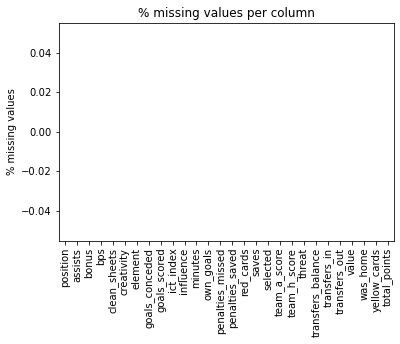

In [42]:
# PLot the percent of missing values per feature

missing_vals = (df.isna().sum()/df.shape[0])*100
ax = missing_vals.plot(kind='bar')
ax.set_title('% missing values per column')
ax.set_ylabel('% missing values')
plt.show()

Let's analyze the features to see which ones are categorical versus which ones are numerical

In [43]:
# Find which features are numerical vs. categorical for EDA

num_vars = []
cat_vars = []
num_cat_vars = []

for column in list(df.columns): 
    
    if df[column].dtype == 'float64' and len(df[column].unique()) >= 10: 
        num_vars.append(column)
    elif df[column].dtype == 'float64': 
        num_cat_vars.append(column)
    else: 
        cat_vars.append(column)
        
    print("{} has {} unique values of type {}".format(column, len(df[column].unique()), df[column].dtype))

cat_vars.remove('total_points')

position has 4 unique values of type object
assists has 9 unique values of type float64
bonus has 12 unique values of type float64
bps has 215 unique values of type float64
clean_sheets has 5 unique values of type float64
creativity has 8258 unique values of type float64
element has 1776 unique values of type float64
goals_conceded has 20 unique values of type float64
goals_scored has 11 unique values of type float64
ict_index has 3505 unique values of type float64
influence has 5525 unique values of type float64
minutes has 337 unique values of type float64
own_goals has 5 unique values of type float64
penalties_missed has 5 unique values of type float64
penalties_saved has 3 unique values of type float64
red_cards has 4 unique values of type float64
saves has 31 unique values of type float64
selected has 82417 unique values of type float64
team_a_score has 21 unique values of type float64
team_h_score has 25 unique values of type float64
threat has 324 unique values of type float64
t

Examining the distribution for numerical features, numerical features with a small number of categories, and categorical features  ... 

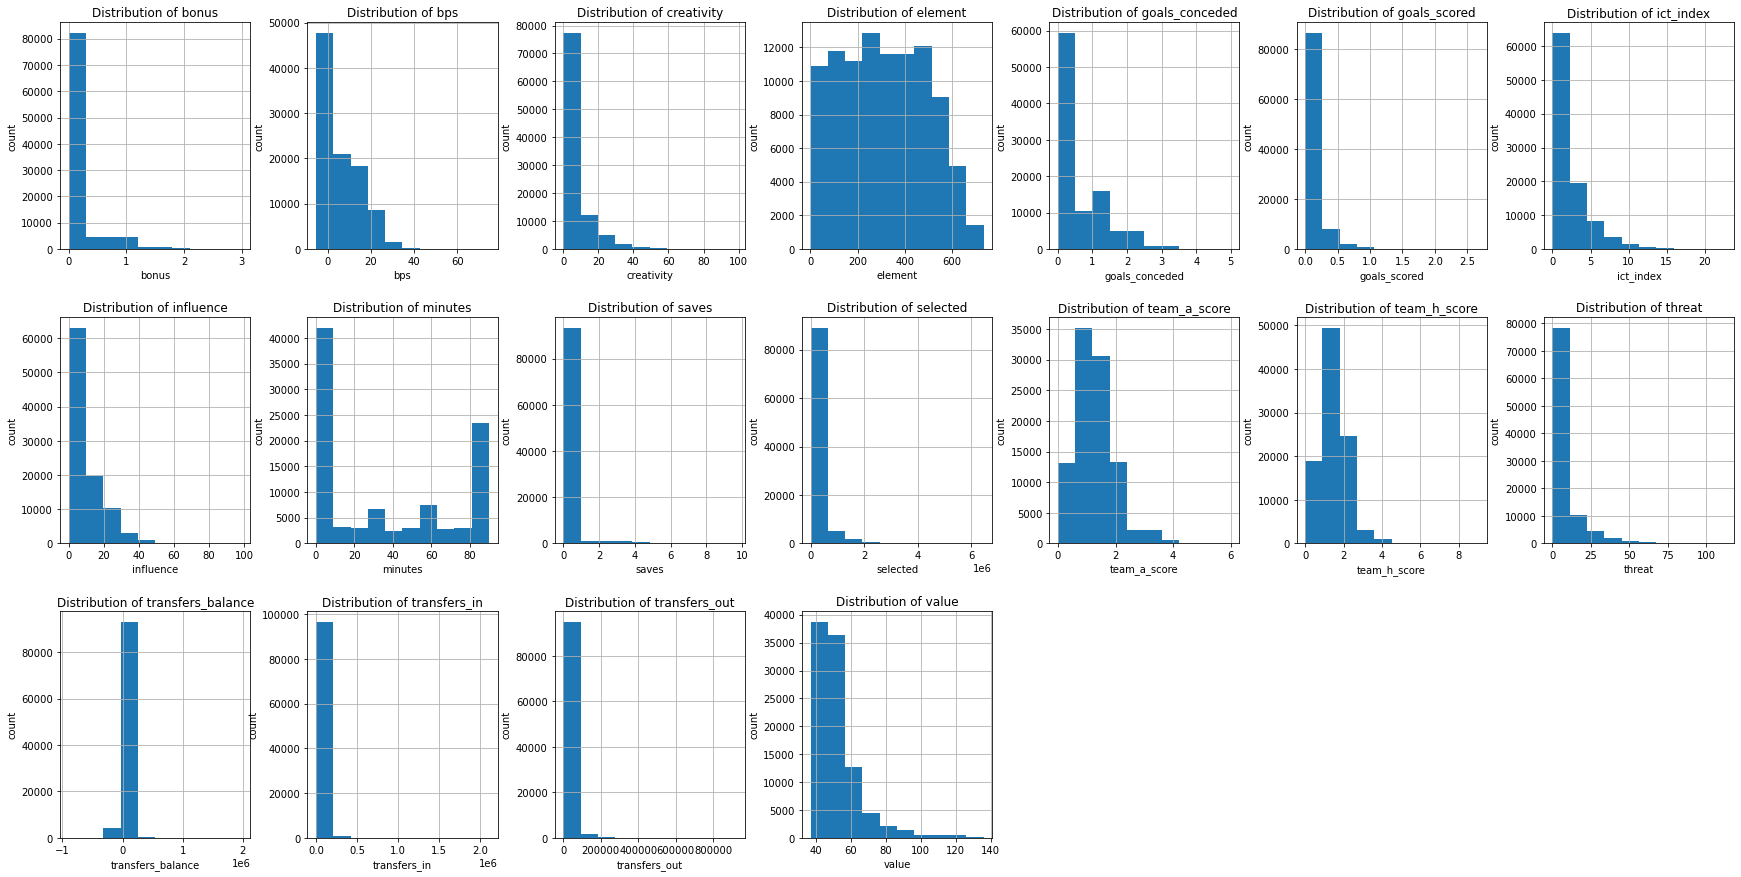

In [44]:
# Examine the distribution for numerical features (floats with 10+ unique values)

hist = df.hist(column=num_vars, layout=(3, 7), figsize=(30, 15))
for ax, column_name in zip(hist.flatten(), sorted(num_vars)):
    ax.set_title("Distribution of {}".format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('count')

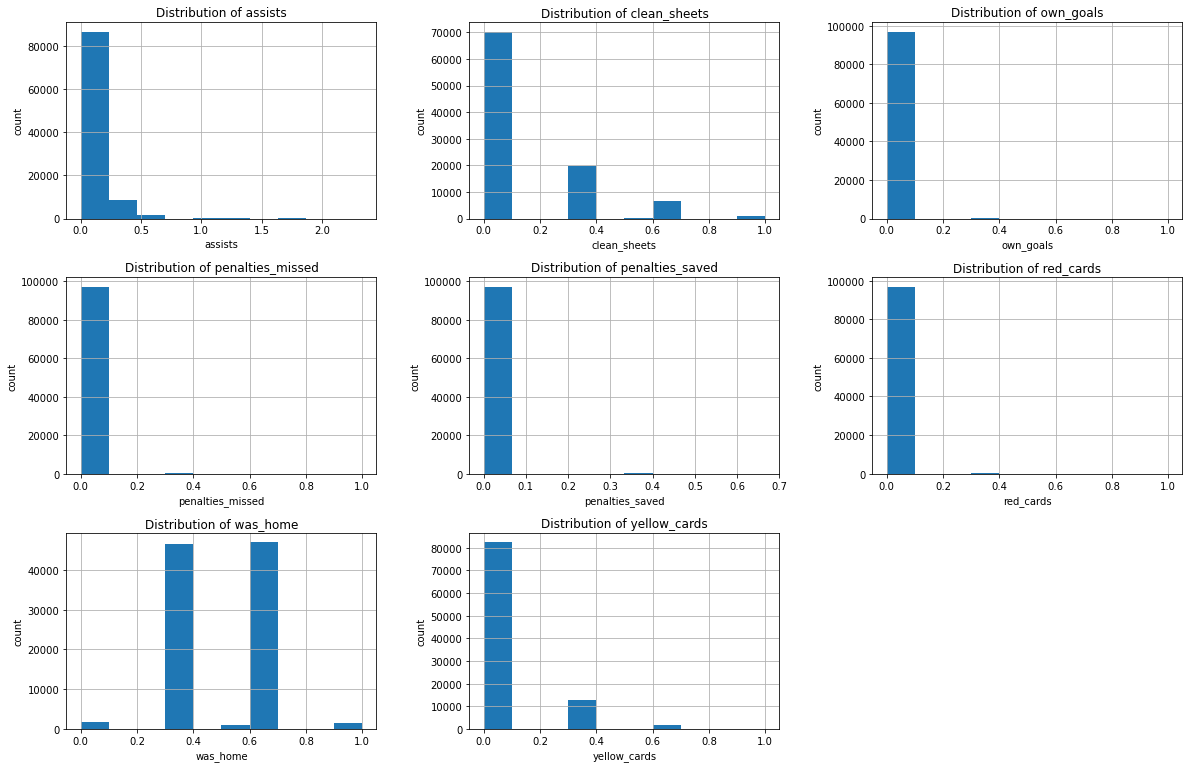

In [45]:
# Examine the distribution for numerical categorical features (floats with <10 unique values)

hist = df.hist(column=num_cat_vars, layout=(3,3), figsize=(20,13))
for ax, column_name in zip(hist.flatten(), sorted(num_cat_vars)):
    ax.set_title("Distribution of {}".format(column_name))
    ax.set_xlabel(column_name)
    ax.set_ylabel('count')

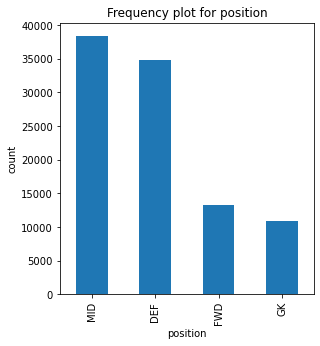

In [52]:
# Examine the distribution for categorical features (non float datatypes that aren't any of the above)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 5))
for index, feature in enumerate(sorted(cat_vars)): 
    df[feature].value_counts().plot(ax=axes[index], subplots=True, kind='bar')
    axes[index].set_xlabel(feature)
    axes[index].set_ylabel('count')
    axes[index].set_title(f'Frequency plot for {feature}')
    
axes[1].remove()

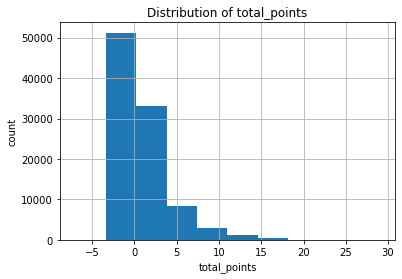

In [53]:
# Examine the distribution of y-labels

df.hist(column='total_points')
plt.title('Distribution of total_points')
plt.xlabel('total_points')
plt.ylabel('count')
plt.show()

Let's look at the correlation between features and target ...

In [54]:
# Split into df_x and df_y

df_x = df.drop(columns=['total_points'])
df_y = df['total_points']

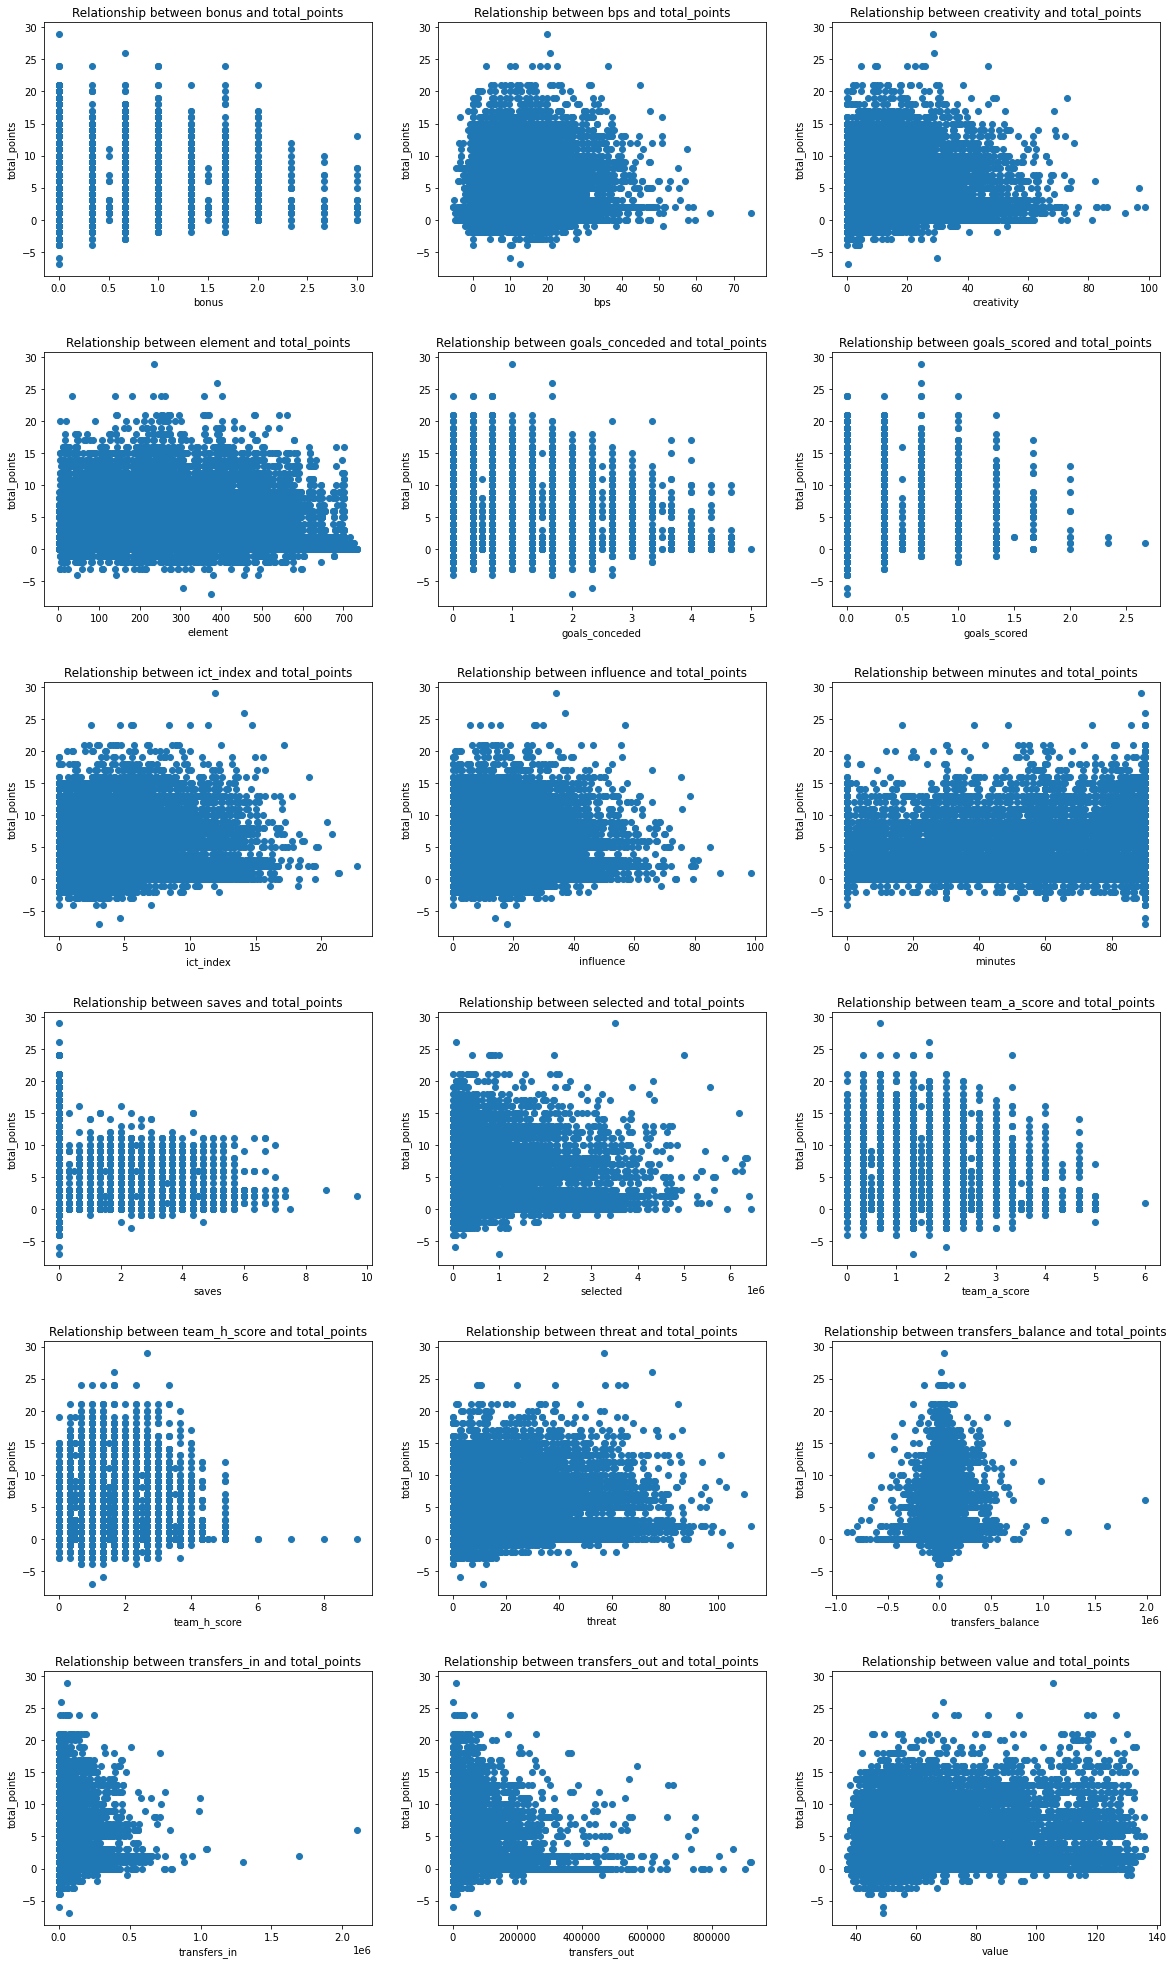

In [56]:
# Examine the correlation with the target for numerical features (floats with 10+ unique values)

fig, axes = plt.subplots(6, 3, figsize=(20,35))
plt.subplots_adjust(hspace=0.3)
for ax, feature in zip(axes.flatten(), sorted(num_vars)): 
    ax.scatter(df_x[feature], df_y)
    ax.set_xlabel(feature)
    ax.set_ylabel('total_points')
    ax.set_title(f'Relationship between {feature} and total_points')


In [57]:
[str(round(float(label.get_text()), 2)) for label in ax.get_xticklabels()]

['20.0', '40.0', '60.0', '80.0', '100.0', '120.0', '140.0', '160.0']

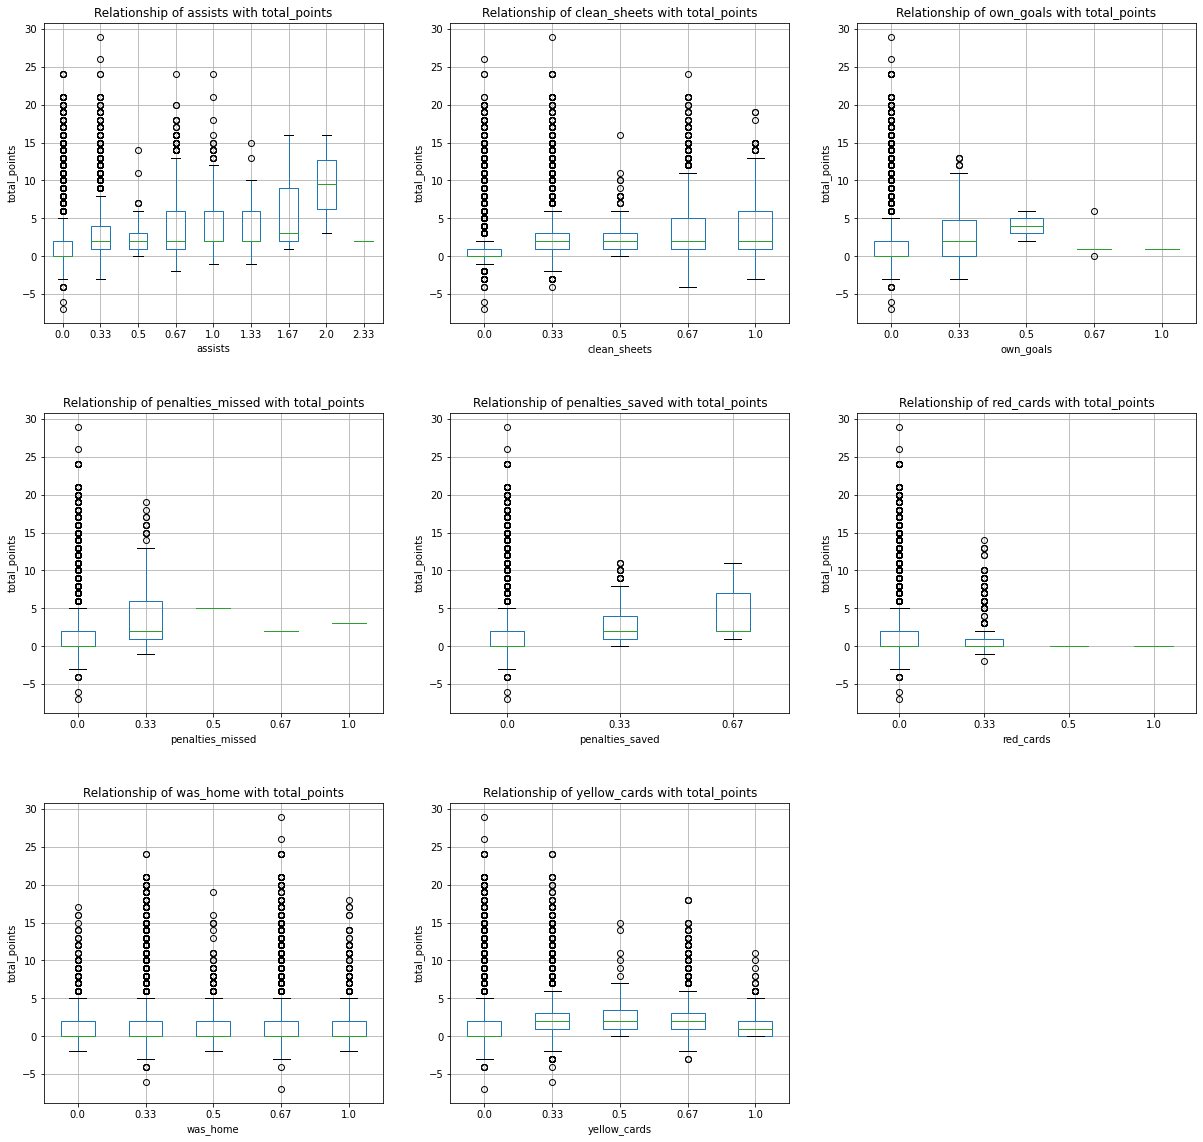

In [58]:
# Examine the correlation with the target for numerical categorical features (floats with <10 unique values)
from matplotlib.ticker import StrMethodFormatter

fig, axes = plt.subplots(3, 3, figsize=(20,20))
plt.subplots_adjust(hspace = 0.3)

for ax, feature in zip(axes.flatten(), sorted(num_cat_vars)):
    df.boxplot(column=['total_points'], by=[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('total_points')
    ax.set_title(f'Relationship of {feature} with total_points')
    ax.set_xticklabels([str(round(float(label.get_text()), 2)) for label in ax.get_xticklabels()])
    
plt.suptitle('');
fig.delaxes(axes[2][2])

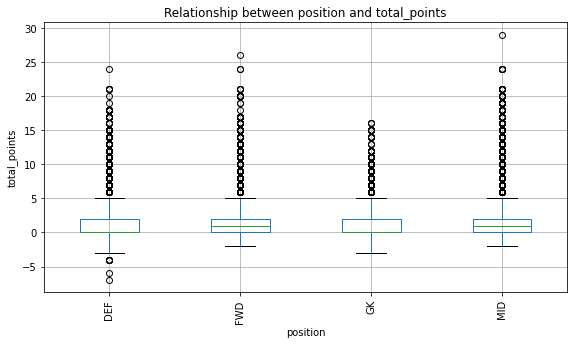

In [60]:
# Examine the correlation with the target for categorical features

fig, axes = plt.subplots(1, 2, figsize=(20,5))

for ax, feature in zip(axes.flatten(), sorted(cat_vars)): 
    df.boxplot(column=['total_points'], by=[feature], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('total_points')
    ax.set_title(f'Relationship between {feature} and total_points')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

axes[1].remove()
plt.xticks(rotation = 90)
plt.suptitle('');

Let's look at highly correlated features

In [61]:
df_corr = df.corr()
df_corr.style.background_gradient(cmap='coolwarm')

,assists,bonus,bps,clean_sheets,creativity,element,goals_conceded,goals_scored,ict_index,influence,minutes,own_goals,penalties_missed,penalties_saved,red_cards,saves,selected,team_a_score,team_h_score,threat,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,total_points
assists,1.000000,0.377033,0.430205,0.225766,0.510736,-0.066618,0.179869,0.231271,0.512622,0.420755,0.299450,0.001914,0.040318,-0.012641,0.001158,-0.057165,0.241133,0.074997,0.093357,0.384690,0.159274,0.277810,0.147296,0.310946,0.009071,0.093849,0.202383
bonus,0.377033,1.000000,0.668355,0.387252,0.403524,-0.081748,0.182278,0.648114,0.610437,0.659243,0.407769,0.010240,0.046574,0.099245,-0.002989,0.124159,0.304650,-0.002343,0.011072,0.473963,0.242980,0.368914,0.157072,0.301432,0.009108,0.085309,0.248817
bps,0.430205,0.668355,1.000000,0.637346,0.579632,-0.170834,0.544278,0.536232,0.800060,0.934918,0.856918,0.043361,0.036074,0.089955,-0.014530,0.270053,0.389395,0.013910,0.051643,0.514528,0.234774,0.387018,0.189422,0.306345,0.014033,0.253543,0.430094
clean_sheets,0.225766,0.387252,0.637346,1.000000,0.400653,-0.125375,0.074933,0.225908,0.497281,0.506331,0.596548,0.008042,0.037663,0.019007,0.001853,0.114415,0.283019,-0.156107,-0.100438,0.357372,0.156204,0.269259,0.140524,0.245652,0.024732,0.201540,0.304414
creativity,0.510736,0.403524,0.579632,0.400653,1.000000,-0.134496,0.375522,0.349459,0.817518,0.562421,0.571947,0.006628,0.079509,-0.027715,0.006594,-0.108688,0.335844,0.011634,0.040293,0.566669,0.157415,0.344592,0.231838,0.440622,0.020633,0.225732,0.331963
element,-0.066618,-0.081748,-0.170834,-0.125375,-0.134496,1.000000,-0.131781,-0.068895,-0.162533,-0.164159,-0.186727,-0.013111,-0.021528,-0.004045,-0.014363,-0.030783,-0.134752,-0.001557,-0.008610,-0.115464,0.012018,-0.065302,-0.095150,-0.174114,-0.001872,-0.076569,-0.112250
goals_conceded,0.179869,0.182278,0.544278,0.074933,0.375522,-0.131781,1.000000,0.186808,0.502916,0.579298,0.743303,0.096169,0.037729,0.054138,0.055047,0.209893,0.203494,0.157300,0.178384,0.323596,0.063637,0.172141,0.134178,0.131195,-0.021293,0.302317,0.304264
goals_scored,0.231271,0.648114,0.536232,0.225908,0.349459,-0.068895,0.186808,1.000000,0.673759,0.634203,0.304338,0.007140,0.095847,-0.015150,0.003707,-0.059290,0.299288,0.072222,0.091090,0.685659,0.244942,0.395750,0.187726,0.435876,0.011899,0.096687,0.235878
ict_index,0.512622,0.610437,0.800060,0.497281,0.817518,-0.162533,0.502916,0.673759,1.000000,0.850082,0.745004,0.031291,0.113903,0.019445,0.007009,0.038610,0.446011,0.032050,0.062957,0.864673,0.243604,0.472347,0.283730,0.535827,0.018669,0.262883,0.430281
influence,0.420755,0.659243,0.934918,0.506331,0.562421,-0.164159,0.579298,0.634203,0.850082,1.000000,0.817655,0.055816,0.073142,0.100742,0.005093,0.301279,0.384305,0.042578,0.071358,0.583142,0.234744,0.392949,0.196765,0.326525,0.007074,0.275875,0.415571


bps        influence    0.934918
           minutes      0.856918
ict_index  influence    0.850082
           threat       0.864673
dtype: float64

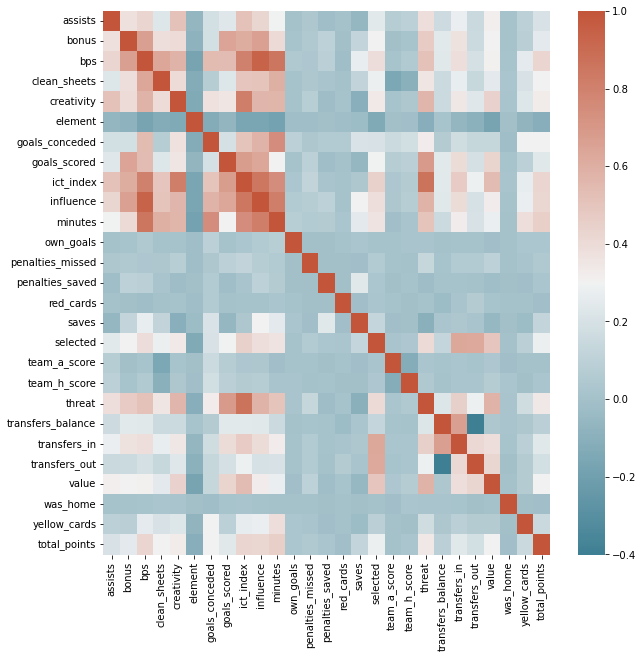

In [62]:
# heatmap of correlation matrix
df_corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# Take a loot at the most highly correlated features
df_corr[df_corr >= 0.85].where(np.triu(np.ones(df_corr.shape), k = 1).astype(np.bool8)).stack()

In [63]:
# Take a loot at the most highly correlated features
df_corr[df_corr >= 0.85].where(np.triu(np.ones(df_corr.shape), k = 1).astype(np.bool8)).stack()

bps        influence    0.934918
           minutes      0.856918
ict_index  influence    0.850082
           threat       0.864673
dtype: float64

# Let's try to apply some models on the raw data (purely on individual player data)

We'll start with decision trees becuase these handle categorical features on the fly

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


In [ ]:
# Get rid of any non-individual statistics or statistics that don't capture player performance
non_individual_stats = ['name', 'season_x', 'kickoff_time', 'opponent_team', 'opp_team_name', 'team_a_score', 'team_h_score', 'GW']
df_x = df_x.drop(columns=non_individual_stats, errors='ignore')

# Split the dataset into train and test using STRUCTURED SPLITTING
x_dev, x_test, y_dev, y_test = train_test_split(df_x, df_y, test_size = 0.2, shuffle=False)

In [40]:
# Fit the random forest classifier
preprocess = make_column_transformer((OneHotEncoder(handle_unknown="ignore"), ['position']), remainder="passthrough")
pipe = make_pipeline(preprocess, RandomForestRegressor(max_depth=15))
pipe.fit(X_dev, y_dev)

# Test accuracies on the most recent 20% of data
y_pred = pipe.predict(X_test)

print("Mean Absolute Error: " + str(mean_absolute_error(y_test, y_pred)))

Mean Absolute Error: 1.3655864292835125


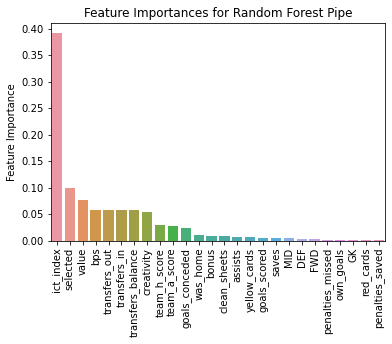

In [42]:
# Build the list of feature names
ohe_feature_names = preprocess.named_transformers_["onehotencoder"].get_feature_names().tolist()
ohe_feature_names = [x[3:] for x in ohe_feature_names]
feature_names = ohe_feature_names + list(df.loc[:, df.columns!='total_points'].drop(columns=['position']).columns)

# Get the importance of features
feat_imps = zip(feature_names, pipe[1].feature_importances_)
feats, imps = zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)), key=lambda x: x[1], reverse=True)))

# Plot the results
ax = sns.barplot(list(feats), list(imps))
ax.tick_params(axis='x', rotation=90)
ax.set_title('Feature Importances for Random Forest Pipe')
ax.set_ylabel('Feature Importance')
plt.show()

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [45]:
# Search coefficients as a function of alpha values

alphas = np.linspace(0.01,100,100)
lasso = Lasso(max_iter=1000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(preprocess.transform(X_dev), y_dev)
    coefs.append(lasso.coef_)

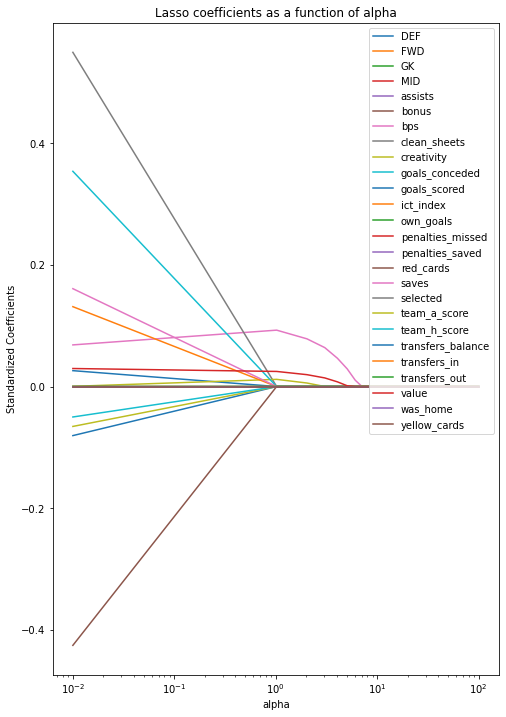

In [48]:
# Plot the results (still needs to be cleaned up/formatted better)

plt.figure(figsize=(8,12))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.legend(feature_names, loc = 'upper right')

In [49]:
for i in range(len(feature_names)):
    for j in range(100):
        if coefs[j][i] == 0:
            print("Feature {} weights 0 at alpha = {}".format(feature_names[i],alphas[j]))
            break

Feature DEF weights 0 at alpha = 1.02
Feature FWD weights 0 at alpha = 0.01
Feature GK weights 0 at alpha = 0.01
Feature MID weights 0 at alpha = 0.01
Feature assists weights 0 at alpha = 0.01
Feature bonus weights 0 at alpha = 1.02
Feature bps weights 0 at alpha = 7.08
Feature clean_sheets weights 0 at alpha = 1.02
Feature creativity weights 0 at alpha = 3.04
Feature goals_conceded weights 0 at alpha = 1.02
Feature goals_scored weights 0 at alpha = 1.02
Feature ict_index weights 0 at alpha = 1.02
Feature own_goals weights 0 at alpha = 0.01
Feature penalties_missed weights 0 at alpha = 0.01
Feature penalties_saved weights 0 at alpha = 0.01
Feature red_cards weights 0 at alpha = 0.01
Feature saves weights 0 at alpha = 1.02
Feature team_a_score weights 0 at alpha = 1.02
Feature team_h_score weights 0 at alpha = 1.02
Feature transfers_balance weights 0 at alpha = 2.03
Feature value weights 0 at alpha = 6.07
Feature was_home weights 0 at alpha = 0.01
Feature yellow_cards weights 0 at alpha

In [50]:
tmp = []
for i in range(len(feature_names)):
    if coefs[1][i] != 0:
        tmp.append(feature_names[i])
print(tmp)

['bps', 'creativity', 'selected', 'transfers_balance', 'transfers_in', 'transfers_out', 'value']


In [74]:
pipe = make_pipeline(preprocess, Lasso(alpha = 1.02))
pipe.fit(X_dev, y_dev)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['position'])])),
                ('lasso', Lasso(alpha=1.02))])

Text(0.5, 1.0, 'Feature Importance using Lasso')

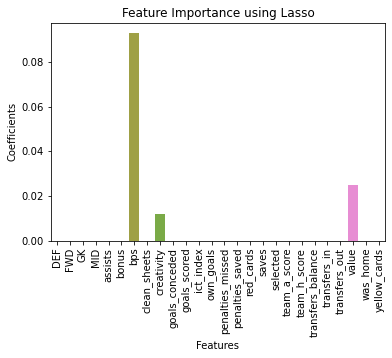

In [75]:
plt.figure()
sns.barplot(y = pipe[1].coef_, x = feature_names)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Feature Importance using Lasso')